In [1]:
import tensorflow as tf
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

Using TensorFlow backend.


In [3]:
env = gym.make('CartPole-v0')

[2017-07-12 23:06:44,506] Making new env: CartPole-v0


In [4]:
state = env.reset()
for i in range(500):
    next_state, reward, done, _ = env.step(env.action_space.sample())
    print(reward)
    if done:
        print(i)
        break

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
15


In [19]:
lr = 0.001
mem_size = 2000
episodes = 1000
steps = 2000

epsilon = 1
epsilon_min = 0.01
epsilon_decay = 0.995
gamma = 0.95
batch_size = 32

In [20]:
bot = Sequential()
bot.add(Dense(units=24, input_dim=4, activation='relu'))
bot.add(Dense(units=24, activation='relu'))
bot.add(Dense(units=2, activation='linear'))
bot.compile(loss='mse', optimizer=Adam(lr))

memory = deque(maxlen=mem_size)

In [21]:
reward_list = []
for episode in range(episodes):
    state = env.reset()
    total_rewards = 0
    for step in range(steps):
        if epsilon >= np.random.rand():
            action = env.action_space.sample()
        else:
            action = np.argmax(bot.predict(np.reshape(state, (1, 4))))
        next_state, reward, done, _ = env.step(action)
        # reward = reward if not done else -10
        memory.append((state, action, next_state, reward, done))
        total_rewards = total_rewards + reward
        state = next_state
        if done:
            reward_list.append(total_rewards)
            print('episode:{} steps:{} total_reward:{} epsilon:{}'.format(episode+1, step+1, total_rewards, epsilon))
            break
    
    minibatch = [memory[ii] for ii in np.random.choice(range(len(memory)), batch_size)]
    for state, action, next_state, reward, done in minibatch:
        target = reward
        if not done:
            target = reward + gamma * np.amax(bot.predict(np.reshape(next_state, (1, 4))))
        target_act = bot.predict(np.reshape(state, (1, 4)))
        target_act[0][action] = target
        bot.fit( np.reshape(state, (1, 4)), target_act, epochs=1, verbose=0)
    if epsilon > epsilon_min:
        epsilon = epsilon * epsilon_decay

episode:1 steps:20 total_reward:20.0 epsilon:1
episode:2 steps:11 total_reward:11.0 epsilon:0.995
episode:3 steps:89 total_reward:89.0 epsilon:0.990025
episode:4 steps:18 total_reward:18.0 epsilon:0.985074875
episode:5 steps:12 total_reward:12.0 epsilon:0.9801495006250001
episode:6 steps:26 total_reward:26.0 epsilon:0.9752487531218751
episode:7 steps:13 total_reward:13.0 epsilon:0.9703725093562657
episode:8 steps:24 total_reward:24.0 epsilon:0.9655206468094844
episode:9 steps:15 total_reward:15.0 epsilon:0.960693043575437
episode:10 steps:55 total_reward:55.0 epsilon:0.9558895783575597
episode:11 steps:13 total_reward:13.0 epsilon:0.9511101304657719
episode:12 steps:12 total_reward:12.0 epsilon:0.946354579813443
episode:13 steps:14 total_reward:14.0 epsilon:0.9416228069143757
episode:14 steps:18 total_reward:18.0 epsilon:0.9369146928798039
episode:15 steps:28 total_reward:28.0 epsilon:0.9322301194154049
episode:16 steps:13 total_reward:13.0 epsilon:0.9275689688183278
episode:17 steps:9

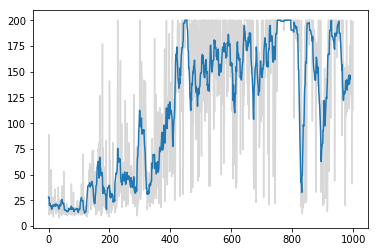

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

smoothed_rews = running_mean(reward_list, 10)

plt.plot(reward_list, color='grey', alpha=0.3)
plt.plot(smoothed_rews)

In [28]:
state = env.reset()
total_reward = 0
for i in range(500):
    env.render()
    next_state, reward, done, _ = env.step(np.argmax(bot.predict(np.reshape(state, (1, 4)))))
    total_reward = total_reward + reward
    state = next_state
    if done:
        print(total_reward)
        env.close()
        break

200.0
